In [2]:
%load_ext autoreload
%autoreload 2

import importlib

In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np
import seirsplus

from seirsplus.viral_model import ViralExtSEIRNetworkModel, VL_PARAMS
from seirsplus.sim_loops_pooled_test import SimulationRunner
from seirsplus.run_meta_simulation_g2 import run_simulation

import pickle

import warnings
warnings.filterwarnings('ignore')

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
path_ = f'/home/yz685/corr_pooling_seirsplus/results/US_pop_size=10000_init_prev=0.01_num_groups=1_pool_size=20_horizon=100_beta=0.1_sigma=0.2_lamda=0.5_gamma=0.25_LoD=1240_edge_weight=10_alpha=2.0_peak_VL=6.0_distancing_scale=50.0_dilute=sum'

TRIAL_IDX = 29

filepath = path_ + f"/naive/results_{TRIAL_IDX}.pickle"
with open(filepath, "rb") as f:
    naive_res = pickle.load(f)
filepath = path_ + f"/naive/individual_results_{TRIAL_IDX}.pickle"
with open(filepath, "rb") as f:
    naive_res_ind = pickle.load(f)

filepath = path_ + f"/correlated_weak/results_{TRIAL_IDX}.pickle"
with open(filepath, "rb") as f:
    corr_res = pickle.load(f)
filepath = path_ + f"/correlated_weak/individual_results_{TRIAL_IDX}.pickle"
with open(filepath, "rb") as f:
    corr_res_ind = pickle.load(f)

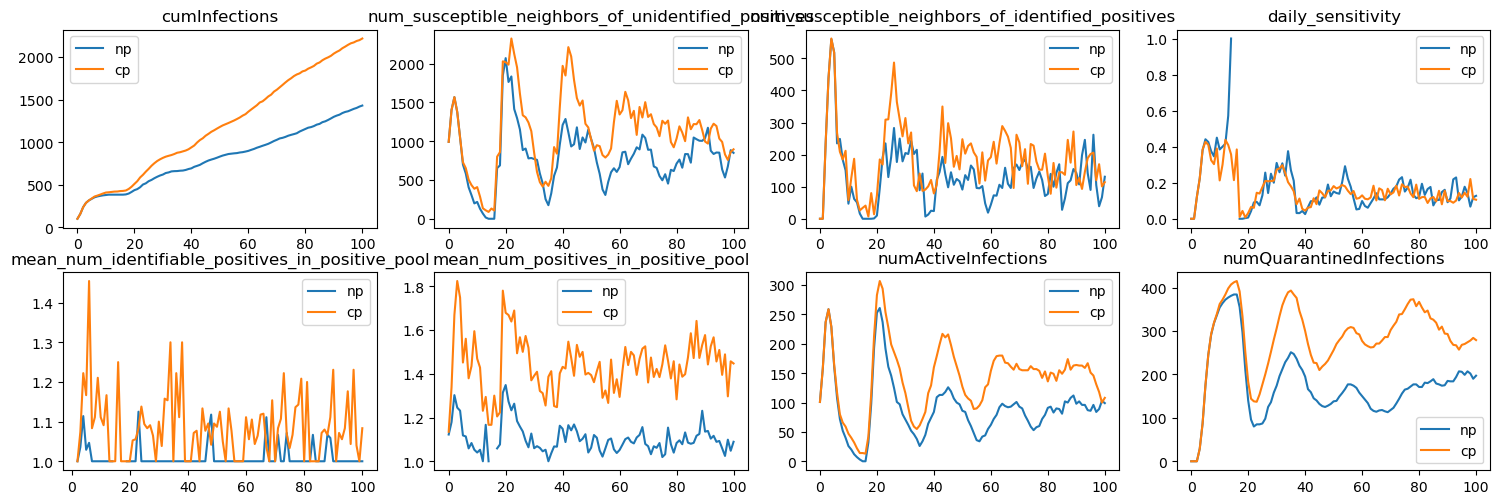

In [12]:
# macroscopic performance

fig, axs = plt.subplots(2,4,figsize=(15,5))
plt.tight_layout()

for i,m in enumerate([
    "cumInfections", 
    "num_susceptible_neighbors_of_unidentified_positives",
    "num_susceptible_neighbors_of_identified_positives",
    "daily_sensitivity",
    "mean_num_identifiable_positives_in_positive_pool",
    "mean_num_positives_in_positive_pool",
    "numActiveInfections",
    "numQuarantinedInfections",
    # "VL_in_positive_pools",
]):

    # if m == "VL_in_positive_pools":

    axs[i//4][i%4].plot([naive_res[i][m] for i in range(len(naive_res))], label="np")
    axs[i//4][i%4].plot([corr_res[i][m] for i in range(len(corr_res))], label="cp")
    axs[i//4][i%4].legend()
    axs[i//4][i%4].set_title(m)


In [13]:
naive_res[35]

{'cum_positives_screened': 3956,
 'cum_positives_identified': 645,
 'cum_sensitivity': 0.16304347826086957,
 'cum_num_tests': 30681,
 'day': 35,
 'cumRecovered': 384.0,
 'cumInfections': 661.0,
 'numActiveInfections': 26.0,
 'numQuarantinedInfections': 251.0,
 'mean_num_positives_in_positive_pool': 1.0,
 'mean_num_identifiable_positives_in_positive_pool': 1.0,
 'median_num_positives_in_positive_pool': 1.0,
 'median_num_identifiable_positives_in_positive_pool': 1.0,
 'daily_sensitivity': 0.2692307692307692,
 'daily_effective_efficiency': 0.010802469135802469,
 'daily_effective_followup_efficiency': 0.04375,
 'num_susceptible_neighbors_of_identified_positives': array([89]),
 'num_susceptible_neighbors_of_unidentified_positives': array([175]),
 'VL_in_positive_pools': [[(9066, 16.61, 3.0)],
  [(3417, 32.51, 3.81)],
  [(1779, 31.08, 4.68)],
  [(3605, 32.2, 4.2)],
  [(2242, 16.55, 3.0)],
  [(3190, 30.78, 4.82)],
  [(9083, 33.49, 3.23)],
  [(1016, 33.55, 3.17)],
  [(2890, 32.97, 3.69)],
  [(

In [14]:
corr_res[35
        ]

{'cum_positives_screened': 4890,
 'cum_positives_identified': 841,
 'cum_sensitivity': 0.1719836400817996,
 'cum_num_tests': 33520,
 'day': 35,
 'cumRecovered': 422.0,
 'cumInfections': 876.0,
 'numActiveInfections': 61.0,
 'numQuarantinedInfections': 393.0,
 'mean_num_positives_in_positive_pool': 1.3863636363636365,
 'mean_num_identifiable_positives_in_positive_pool': 1.0,
 'median_num_positives_in_positive_pool': 1.0,
 'median_num_identifiable_positives_in_positive_pool': 1.0,
 'daily_sensitivity': 0.18032786885245902,
 'daily_effective_efficiency': 0.015235457063711912,
 'daily_effective_followup_efficiency': 0.04583333333333333,
 'num_susceptible_neighbors_of_identified_positives': array([141]),
 'num_susceptible_neighbors_of_unidentified_positives': array([424]),
 'VL_in_positive_pools': [[(8475, 33.08, 3.73)],
  [(4070, 33.71, 3.18)],
  [(3698, 32.22, 4.14)],
  [(3695, 34.17, 2.47)],
  [(8498, 31.5, 5.04)],
  [(7491, 31.54, 4.66)],
  [(2747, 14.42, 3.0), (3764, 34.05, 2.83)],
  [

In [41]:
naive_res_ind["blame_history"][4791 ]

[{'time': 6.845918792633439,
  'state': 3,
  'VL': 3.1254561146996713,
  'infected_node': 4790,
  'contribution': 1.0,
  'edge_weight': 10},
 {'time': 8.035843862254874,
  'state': 3,
  'VL': 4.120580724892829,
  'infected_node': 8792,
  'contribution': 0.5,
  'edge_weight': 10},
 {'time': 23.4524359448015,
  'state': 4,
  'VL': 3.0,
  'infected_node': 2458,
  'contribution': 0.333,
  'edge_weight': 1}]

In [7]:
def plot_sim_individual_history_from_saved(individual_history, blame_history, top_n=10, node=None):

    if type(node) == int:
        nodes = [node]
    elif type(node) == list:
        nodes = node
    elif node is None:
        nodes = list(blame_history.keys())[:top_n]

    fig, axs = plt.subplots(int(np.ceil(len(nodes)/4)),4,figsize=(15,3*int(np.ceil(len(nodes)/4))), squeeze=False)

    for i_k, k in enumerate(nodes):

        row, col = i_k//4, i_k%4

        # plt.figure(figsize=(6,4))

        # plt.plot(
        #     sim.model.VL_over_time["time_points"],
        #     sim.model.VL_over_time["VL_time_series"][k]
        # )

        if "tested_and_missed" in individual_history[k]:
            for i, event in enumerate(individual_history[k]["tested_and_missed"]):
                label="tested and missed" if i == 0 else None
                axs[row][col].axvline(event["time"], color="grey", zorder=1, linestyle="--", label=label)

        if "isolated" in individual_history[k]:
            for event in individual_history[k]["isolated"]:
                axs[row][col].axvline(event["time"], color="red", zorder=1, linestyle="--", label="isolated")

        for i, event in enumerate(blame_history[k]):
            axs[row][col].scatter(
                event["time"], 
                event["VL"],
                color="red", s=event["edge_weight"]*10, alpha=event["contribution"], zorder=2)
        
        axs[row][col].set_title(f"VL and secondary infections from {k}")
        axs[row][col].legend()
        # plt.show()

    plt.tight_layout()

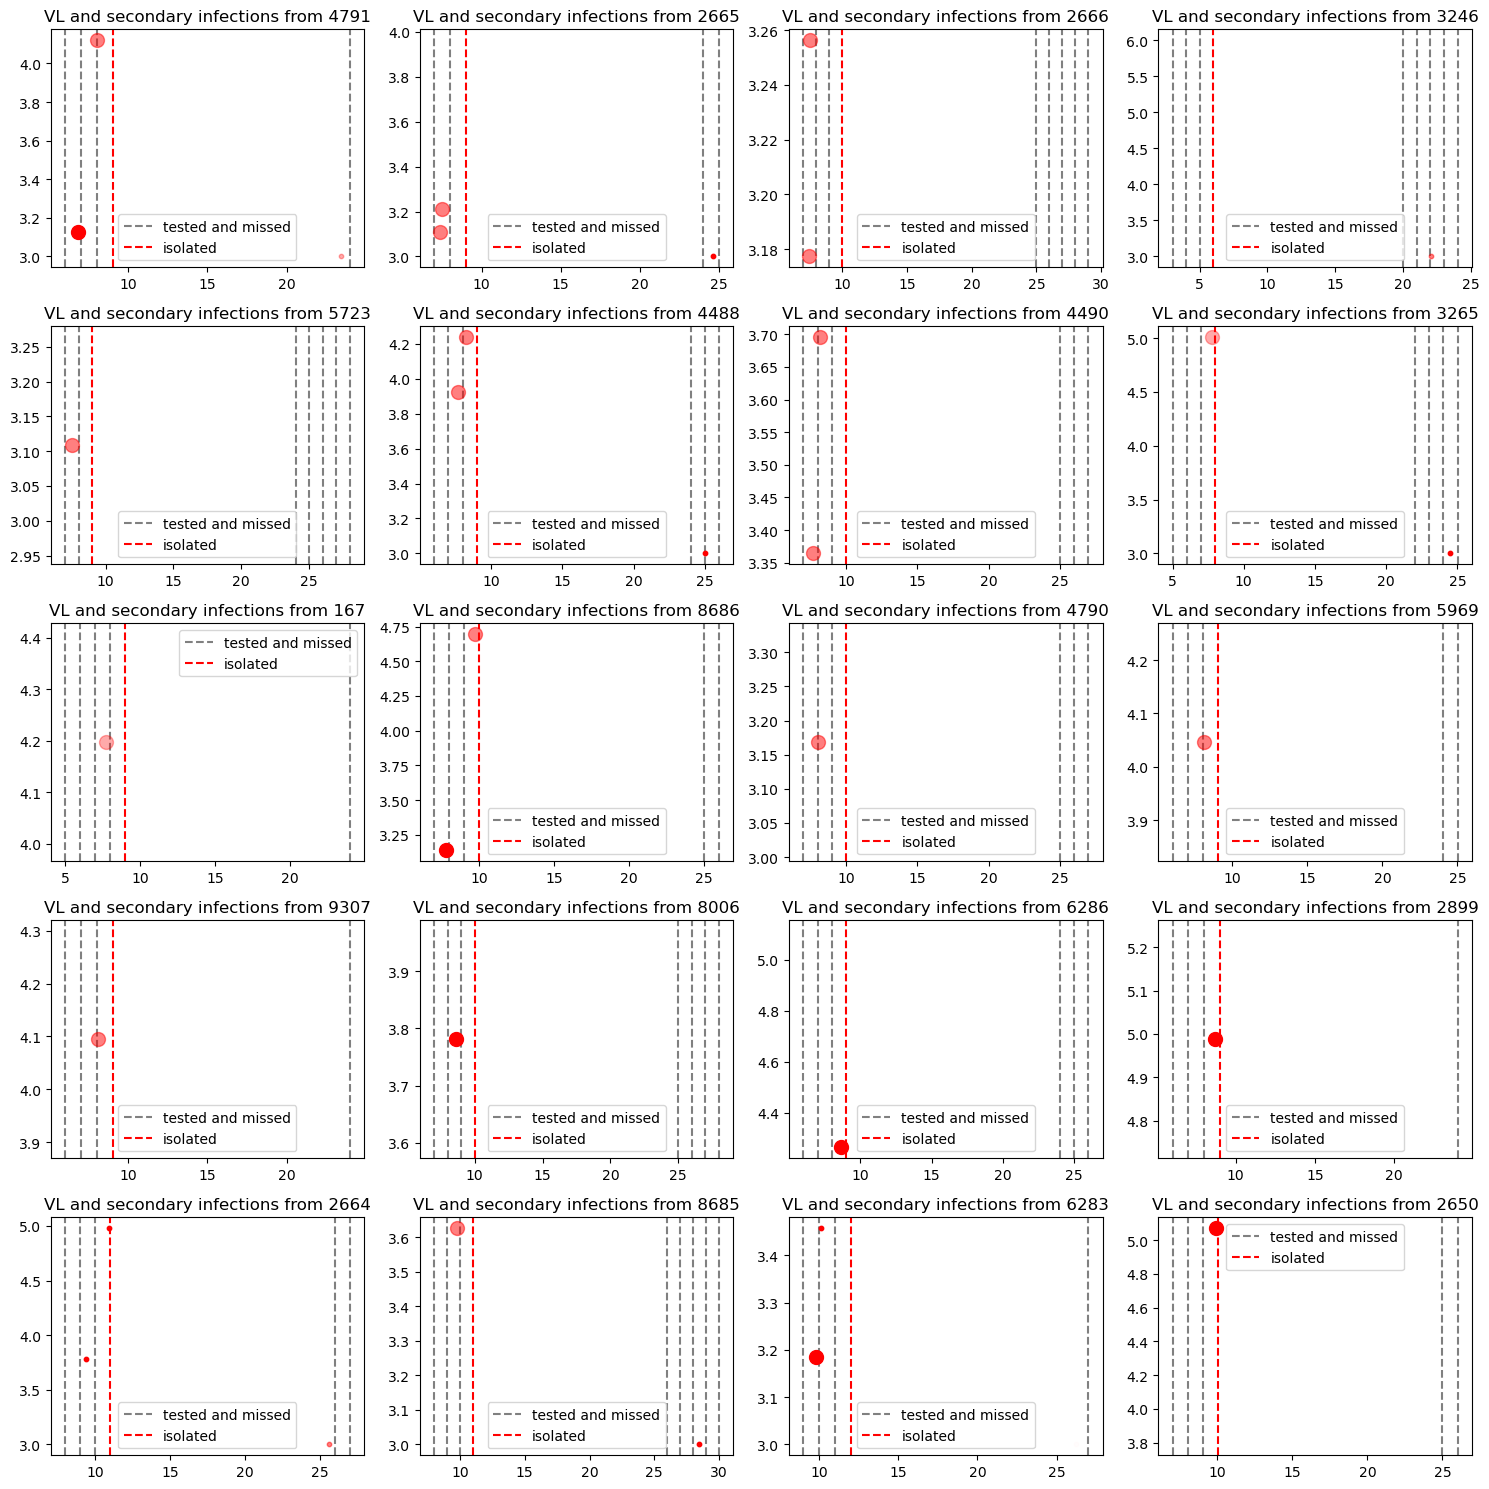

In [8]:
plot_sim_individual_history_from_saved(
    naive_res_ind["individual_history"],
    naive_res_ind["blame_history"],
    node=list(naive_res_ind["blame_history"])[200:220]
)

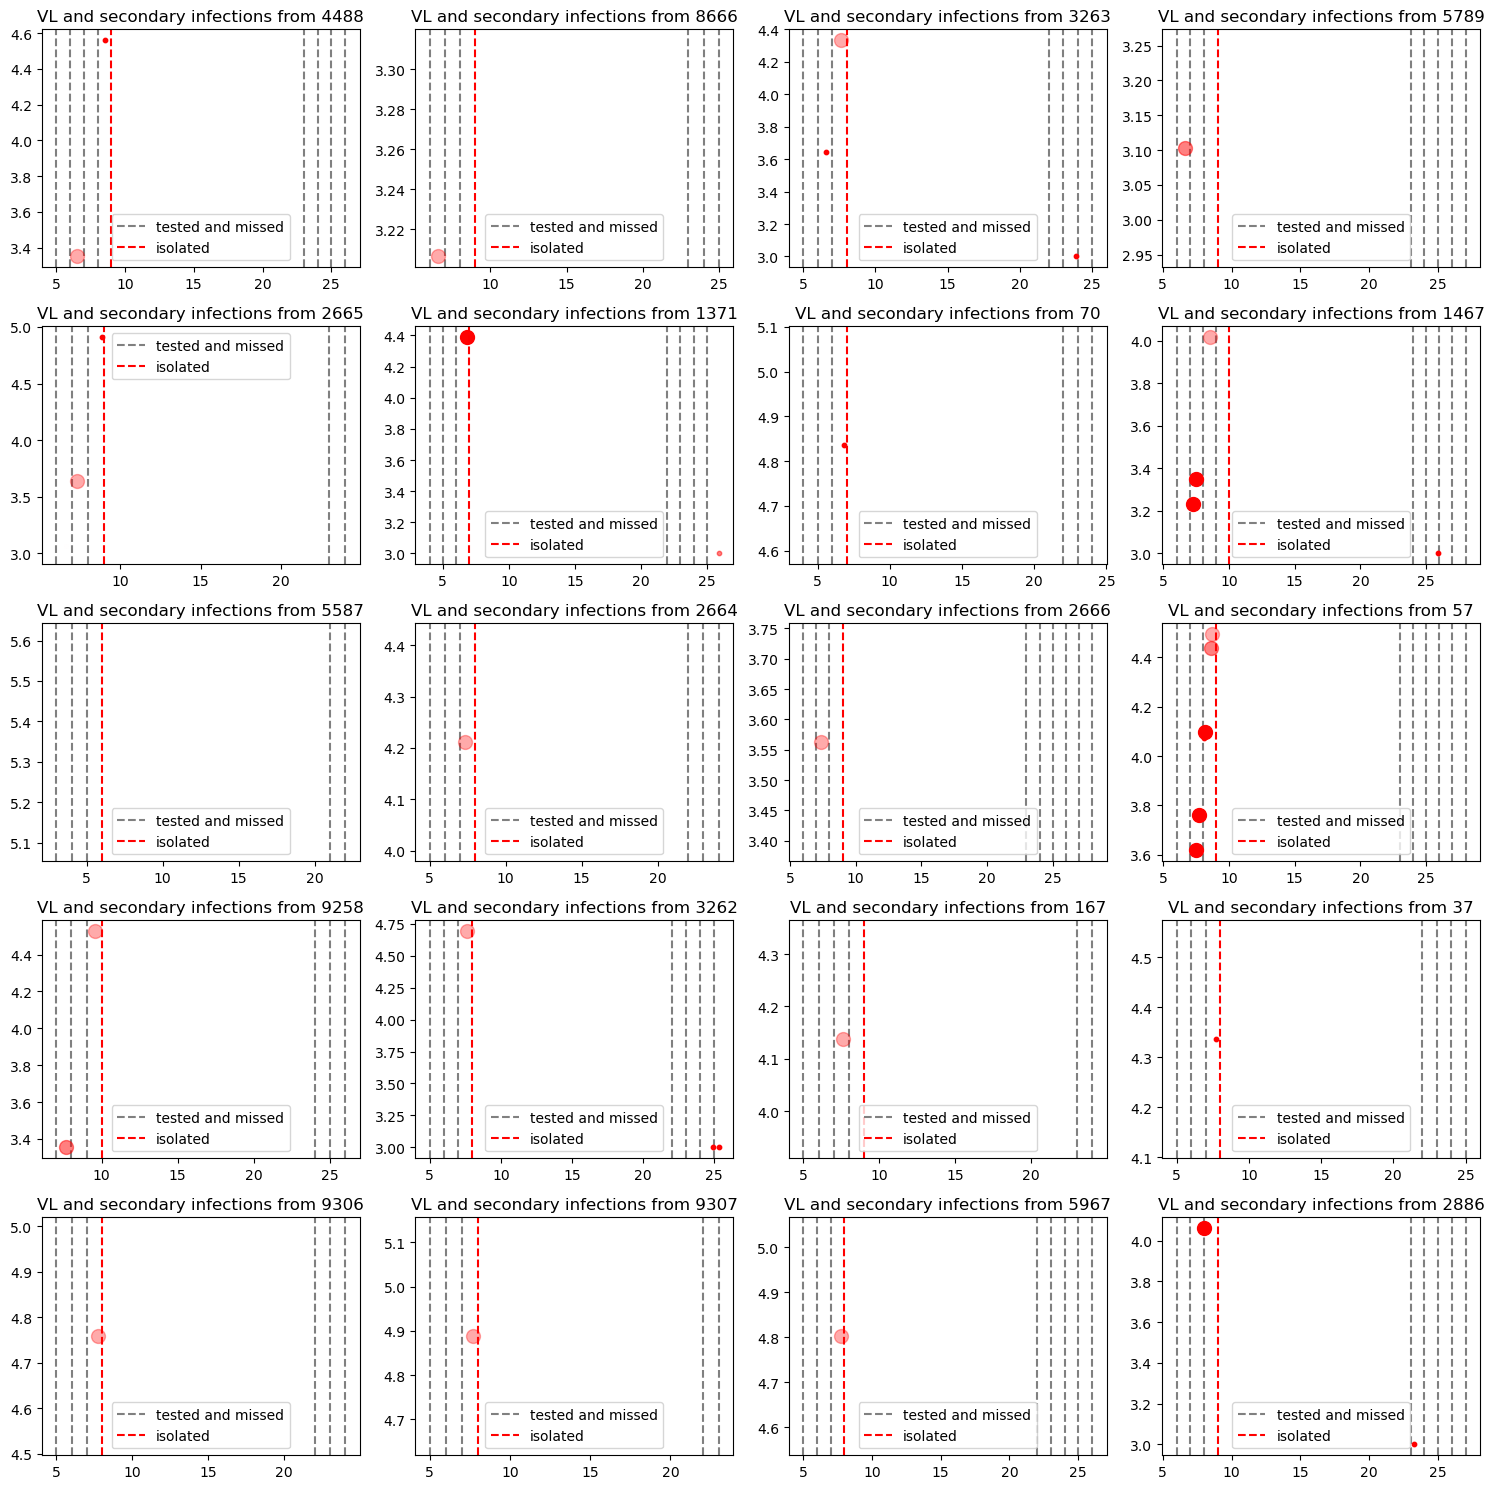

In [9]:
plot_sim_individual_history_from_saved(
    corr_res_ind["individual_history"],
    corr_res_ind["blame_history"],
    node=list(corr_res_ind["blame_history"])[200:220]
)

In [10]:
for k, v in corr_res_ind["blame_history"].items():
    for event in v:
        if event["infected_node"] == 1467:
            print(k,event)

1132 {'time': 5.888217608213542, 'state': 3, 'VL': 4.256700557921139, 'infected_node': 1467, 'contribution': 1.0, 'edge_weight': 1}


In [15]:
corr_res_ind["blame_history"][1132]

[{'time': 4.357695431466844,
  'state': 3,
  'VL': 3.159365466575204,
  'infected_node': 1961,
  'contribution': 1.0,
  'edge_weight': 1},
 {'time': 5.888217608213542,
  'state': 3,
  'VL': 4.256700557921139,
  'infected_node': 1467,
  'contribution': 1.0,
  'edge_weight': 1},
 {'time': 6.818700736064396,
  'state': 3,
  'VL': 4.923826982881823,
  'infected_node': 1370,
  'contribution': 0.01,
  'edge_weight': 1},
 {'time': 8.627141355316597,
  'state': 13,
  'VL': 6.0,
  'infected_node': 1191,
  'contribution': 0.0,
  'edge_weight': 1},
 {'time': 8.706798553520706,
  'state': 13,
  'VL': 6.0,
  'infected_node': 1193,
  'contribution': 0.0,
  'edge_weight': 1},
 {'time': 11.620051162576388,
  'state': 14,
  'VL': 5.673648698149072,
  'infected_node': 1282,
  'contribution': 0.0,
  'edge_weight': 1},
 {'time': 19.896111309691456,
  'state': 14,
  'VL': 3.0,
  'infected_node': 2074,
  'contribution': 0.0,
  'edge_weight': 1},
 {'time': 22.090791478982734,
  'state': 4,
  'VL': 3.0,
  'in

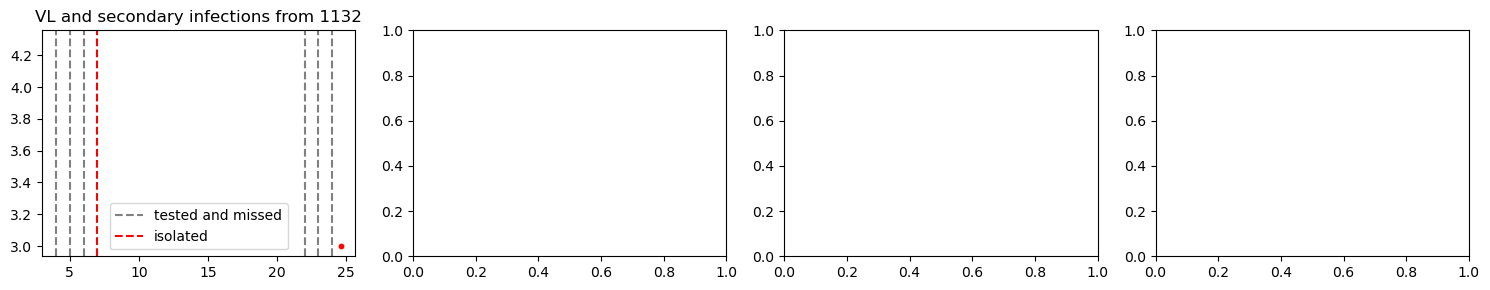

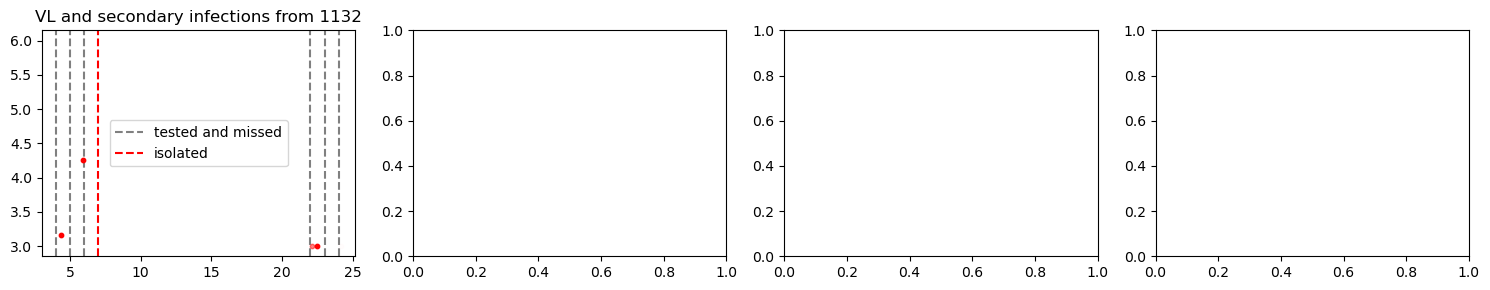

In [14]:
plot_sim_individual_history_from_saved(
    naive_res_ind["individual_history"],
    naive_res_ind["blame_history"],
    node=1132
)

plot_sim_individual_history_from_saved(
    corr_res_ind["individual_history"],
    corr_res_ind["blame_history"],
    node=1132
)

In [13]:
corr_res_ind["blame_history"][50]

[{'time': 4.795926016811053,
  'state': 3,
  'VL': 3.1214451695156886,
  'infected_node': 2664,
  'contribution': 1.0,
  'edge_weight': 10},
 {'time': 5.4464419545566845,
  'state': 3,
  'VL': 3.547199102019489,
  'infected_node': 2666,
  'contribution': 1.0,
  'edge_weight': 10},
 {'time': 5.560202858254203,
  'state': 3,
  'VL': 3.6216540835257893,
  'infected_node': 2665,
  'contribution': 1.0,
  'edge_weight': 10},
 {'time': 5.586777687541646,
  'state': 3,
  'VL': 3.6390469518910993,
  'infected_node': 57,
  'contribution': 1.0,
  'edge_weight': 1},
 {'time': 7.327284570124042,
  'state': 13,
  'VL': 4.778185298566235,
  'infected_node': 2663,
  'contribution': 0.0,
  'edge_weight': 10},
 {'time': 8.11109894910728,
  'state': 13,
  'VL': 5.291181268137127,
  'infected_node': 104,
  'contribution': 0.0,
  'edge_weight': 1}]

In [49]:
corr_res_ind["blame_history"][50]

[{'time': 4.795926016811053,
  'state': 3,
  'VL': 3.1214451695156886,
  'infected_node': 2664,
  'contribution': 1.0,
  'edge_weight': 10},
 {'time': 5.4464419545566845,
  'state': 3,
  'VL': 3.547199102019489,
  'infected_node': 2666,
  'contribution': 1.0,
  'edge_weight': 10},
 {'time': 5.560202858254203,
  'state': 3,
  'VL': 3.6216540835257893,
  'infected_node': 2665,
  'contribution': 1.0,
  'edge_weight': 10},
 {'time': 5.586777687541646,
  'state': 3,
  'VL': 3.6390469518910993,
  'infected_node': 57,
  'contribution': 1.0,
  'edge_weight': 1},
 {'time': 7.327284570124042,
  'state': 13,
  'VL': 4.778185298566235,
  'infected_node': 2663,
  'contribution': 0.0,
  'edge_weight': 10},
 {'time': 8.11109894910728,
  'state': 13,
  'VL': 5.291181268137127,
  'infected_node': 104,
  'contribution': 0.0,
  'edge_weight': 1}]

In [45]:
corr_res_ind["blame_history"][57]

[{'time': 7.463370594977091,
  'state': 3,
  'VL': 3.617680974598136,
  'infected_node': 2699,
  'contribution': 1.0,
  'edge_weight': 10},
 {'time': 7.6696749573538066,
  'state': 3,
  'VL': 3.76305093884928,
  'infected_node': 2700,
  'contribution': 1.0,
  'edge_weight': 10},
 {'time': 8.11109894910728,
  'state': 3,
  'VL': 4.074095209370445,
  'infected_node': 104,
  'contribution': 1.0,
  'edge_weight': 1},
 {'time': 8.1432377603643,
  'state': 3,
  'VL': 4.096741448110546,
  'infected_node': 1192,
  'contribution': 1.0,
  'edge_weight': 10},
 {'time': 8.627141355316597,
  'state': 3,
  'VL': 4.437718475880632,
  'infected_node': 1191,
  'contribution': 0.5,
  'edge_weight': 10},
 {'time': 8.706798553520706,
  'state': 3,
  'VL': 4.493847992105464,
  'infected_node': 1193,
  'contribution': 0.332,
  'edge_weight': 10}]

In [11]:
# compute the fraction of immediate secondary infections that are household members

from collections import defaultdict

household_frac = defaultdict(list)
sec_inf = defaultdict(list)

for pm in ["naive", "correlated"]:
    if pm == "naive": res = naive_res_ind
    else: res = corr_res_ind

    for k, v in res["blame_history"].items():
        total_contribution = 0
        household_contribution = 0
        for event in v:
            total_contribution += event["contribution"]
            if event["edge_weight"] == 10:
                household_contribution += event["contribution"]
        sec_inf[pm].append(total_contribution)
        try:
            frac = household_contribution/total_contribution
            household_frac[pm].append(household_contribution/total_contribution)
        except ZeroDivisionError:
            continue



Text(0.5, 1.0, 'Fraction of immediate secondary infections that are household members')

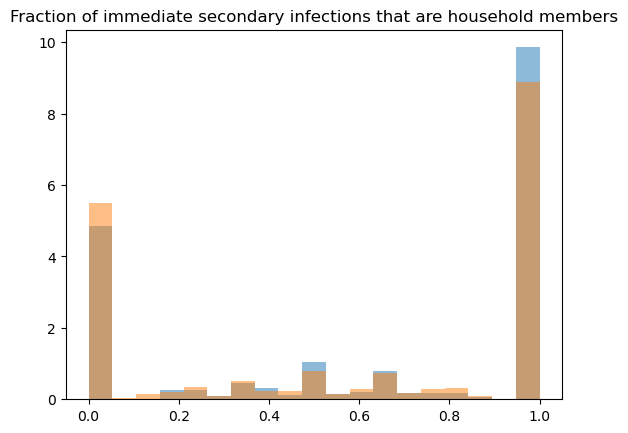

In [27]:
plt.hist(household_frac["naive"], bins=np.linspace(0,1,20), alpha=0.5, label="np", density=True)
plt.hist(household_frac["correlated"], bins=np.linspace(0,1,20), alpha=0.5, label="cp", density=True)

plt.title("Fraction of immediate secondary infections that are household members")

Text(0.5, 1.0, 'Immediate secondary infections')

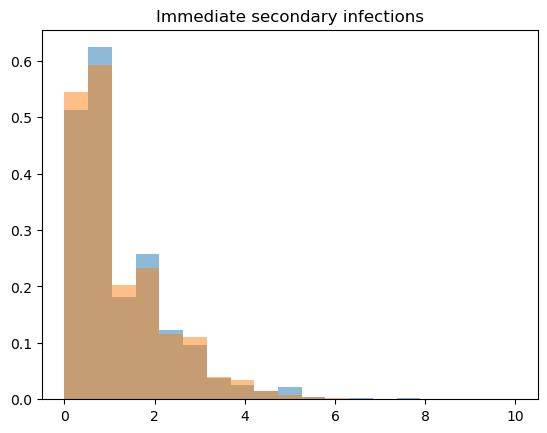

In [26]:
plt.hist(sec_inf["naive"], bins=np.linspace(0,10,20), alpha=0.5, label="np", density=True)
plt.hist(sec_inf["correlated"], bins=np.linspace(0,10,20), alpha=0.5, label="cp", density=True)

plt.title("Immediate secondary infections")

In [24]:
np.quantile(sec_inf["naive"], 0.9)

2.833

In [25]:
np.quantile(sec_inf["correlated"], 0.9)

2.99

In [15]:
# distribution of viral load when caught 


# compute the fraction of immediate secondary infections that are household members

from collections import defaultdict

vl_when_isolated = defaultdict(list)
vl_when_missed = defaultdict(list)

for pm in ["naive", "correlated"]:
    if pm == "naive": res = naive_res_ind
    else: res = corr_res_ind

    for k, v in res["individual_history"].items():

        for event in v["isolated"]:
            vl_when_isolated[pm].append(event["VL"])
        
        for event in v["tested_and_missed"]:
            vl_when_missed[pm].append(event["VL"])


(array([0.        , 0.        , 0.        , 0.27966881, 1.38523459,
        1.38086477, 1.32842686, 1.21044158, 1.33279669, 1.34590616,
        0.77345906, 0.35395584, 0.0873965 , 0.0174793 , 0.00436983,
        0.        , 0.        , 0.        , 0.        ]),
 array([4.        , 4.10526316, 4.21052632, 4.31578947, 4.42105263,
        4.52631579, 4.63157895, 4.73684211, 4.84210526, 4.94736842,
        5.05263158, 5.15789474, 5.26315789, 5.36842105, 5.47368421,
        5.57894737, 5.68421053, 5.78947368, 5.89473684, 6.        ]),
 <BarContainer object of 19 artists>)

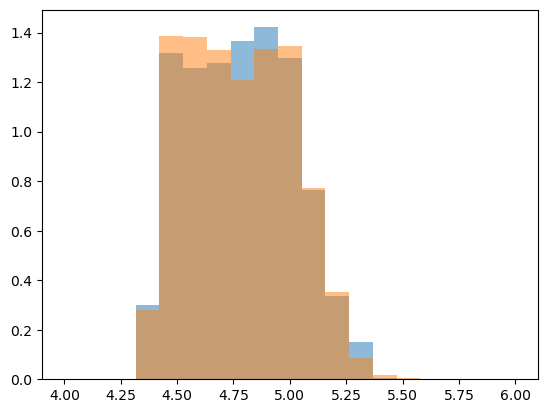

In [10]:
plt.hist(vl_when_isolated["naive"], bins=np.linspace(4,6,20), alpha=0.5, label="np", density=True)
plt.hist(vl_when_isolated["correlated"], bins=np.linspace(4,6,20), alpha=0.5, label="cp", density=True)

(array([0.        , 0.        , 0.0323549 , 0.0582803 , 0.05060638,
        0.05537666, 0.05102119, 0.05931732, 0.05060638, 0.05662107,
        1.489155  , 0.21818817, 0.22565468, 0.22316585, 0.14393782,
        0.        , 0.        , 0.        , 0.        ]),
 array([-1.        , -0.63157895, -0.26315789,  0.10526316,  0.47368421,
         0.84210526,  1.21052632,  1.57894737,  1.94736842,  2.31578947,
         2.68421053,  3.05263158,  3.42105263,  3.78947368,  4.15789474,
         4.52631579,  4.89473684,  5.26315789,  5.63157895,  6.        ]),
 <BarContainer object of 19 artists>)

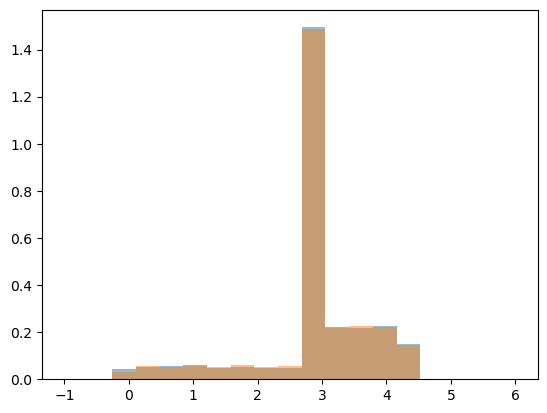

In [19]:
plt.hist(vl_when_missed["naive"], bins=np.linspace(-1,6,20), alpha=0.5, label="np", density=True)
plt.hist(vl_when_missed["correlated"], bins=np.linspace(-1,6,20), alpha=0.5, label="cp", density=True)

In [35]:
parameters = {
    "pop_size": 10000,
    "init_prev": 0.01,
    "horizon": 5,
    "LoD": 1240,
    "beta": 0.1,
    "sigma": 0.2,
    "lamda": 0.5,
    "gamma": 0.25,
    "edge_weight": 10,
    "alpha": 2,
    "peak_VL": 6,
    "distancing_scale": 50,
    "save_results": False
}
control_parameters = {
    "seed": 29,
    "num_groups": 1,
    "pool_size": 20,
    "dilute": "sum",
}

In [23]:
sim_naive = run_simulation(
    **{
        **parameters,
        **control_parameters,
        "pooling_strategy": "naive",
    }   
)

Household size does not match number of age brackets assigned. u20_o60_gt1
Generated overall age distribution:
0-9: 0.1005	(-0.0205 from target)
10-19: 0.1170	(-0.0140 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1410	(0.0080 from target)
40-49: 0.1250	(0.0010 from target)
50-59: 0.1375	(0.0065 from target)
60-69: 0.1290	(0.0140 from target)
70-79: 0.0770	(0.0070 from target)
80+: 0.0320	(-0.0060 from target)

Generated household size distribution:
1: 0.2850	(0.0013 from target)
2: 0.3630	(0.0179 from target)
3: 0.1303	(-0.0203 from target)
4: 0.1242	(-0.0034 from target)
5: 0.0609	(0.0031 from target)
6: 0.0231	(0.0005 from target)
7: 0.0134	(0.0009 from target)
Num households: 821
mean household size: 2.448393594

{'0-9': 201, '10-19': 234, '20-29': 282, '30-39': 282, '40-49': 250, '50-59': 275, '60-69': 258, '70-79': 154, '80+': 64}
Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]


Viral loads in positive pools:  [[], [(613, -1.0, 3.0)], [(112, -1.0, 3.0)], [(1195, -1.0, 3.0)], [], [], [], [(470, -1.0, 3.0)], [], [], [(661, -1.0, 3.0)], [], [], [], [(819, -1.0, 3.0)], [], [(94, -1.0, 3.0)], [(931, -1.0, 3.0), (138, -1.0, 3.0)], [(1560, -1.0, 3.0)]]
infected: 1079, transmissionTerms_I: [10.], transmissionTerms_Q: [0.], household_neighbors: {112, 1080, 341, 1078}, non_household_neighbors: [1163, 1176, 1337, 1146, 1180]
Household member states: [3, 1, 1, 1]
Non-household member states: [1, 1, 1, 1, 1]
Infected node 1079 got contribution from infectious contacts {112: 1.0} and quarantined contacts {}
infected: 1756, transmissionTerms_I: [10.], transmissionTerms_Q: [0.], household_neighbors: {1758, 931, 1757, 1755}, non_household_neighbors: [1616, 1555, 1550]
Household member states: [1, 3, 1, 1]
Non-household member states: [1, 1, 1]
Infected node 1756 got contribution from infectious contacts {931: 1.0} and quarantined contacts {}
infected: 1857, transmissionTerms_I

In [17]:
sim_naive.model.individual_history[819]


defaultdict(list,
            {'tested': [{'time': 2.0042331296165683,
               'infection_state': 3,
               'VL': 4.344355452022804,
               'test_result': 0,
               'false_negative': True}],
             'isolated': [{'time': 5.0056854196871345,
               'infection_state': 13,
               'VL': 6.0}]})

In [6]:
sim_naive.model.blame_history[743]

[{'time': 1.623484302812922,
  'state': 3,
  'infected_node': 747,
  'contribution': 1.0,
  'edge_weight': 10},
 {'time': 2.7121218683888384,
  'state': 3,
  'infected_node': 524,
  'contribution': 1.0,
  'edge_weight': 1},
 {'time': 2.790412842887103,
  'state': 3,
  'infected_node': 745,
  'contribution': 0.5,
  'edge_weight': 10},
 {'time': 2.9835326086686673,
  'state': 3,
  'infected_node': 258,
  'contribution': 0.5,
  'edge_weight': 10},
 {'time': 3.3442305211617485,
  'state': 3,
  'infected_node': 744,
  'contribution': 0.5,
  'edge_weight': 10}]

In [32]:
def plot_sim_individual_history(sim, top_n=10, node=None):

    nodes = [node] if node is not None else list(sim.model.blame_history.keys())[:top_n]

    for k in nodes:

        plt.figure(figsize=(6,4))

        plt.plot(
            sim.model.VL_over_time["time_points"],
            sim.model.VL_over_time["VL_time_series"][k]
        )

        if "tested_and_missed" in sim.model.individual_history[k]:
            for i, event in enumerate(sim.model.individual_history[k]["tested_and_missed"]):
                label="tested and missed" if i == 0 else None
                plt.axvline(event["time"], color="grey", zorder=1, linestyle="--", label=label)

        if "isolated" in sim.model.individual_history[k]:
            for event in sim.model.individual_history[k]["isolated"]:
                plt.axvline(event["time"], color="red", zorder=1, linestyle="--", label="isolated")

        for i, event in enumerate(sim.model.blame_history[k]):
            plt.scatter(
                event["time"], 
                event["VL"],
                color="red", s=event["edge_weight"]*10, alpha=event["contribution"], zorder=2)
        
        plt.title(f"VL and secondary infections from {k}")
        plt.legend()
        plt.show()


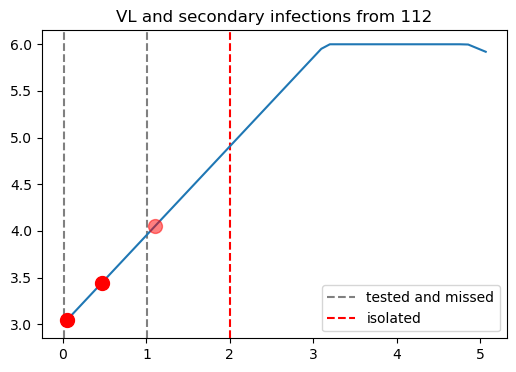

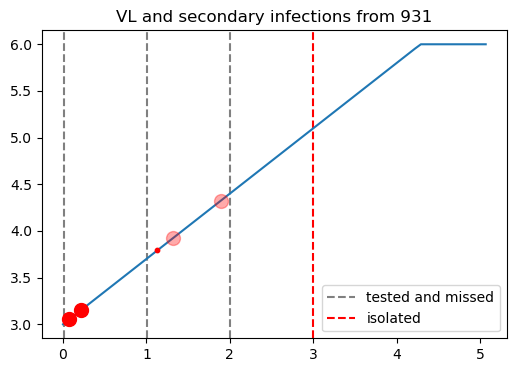

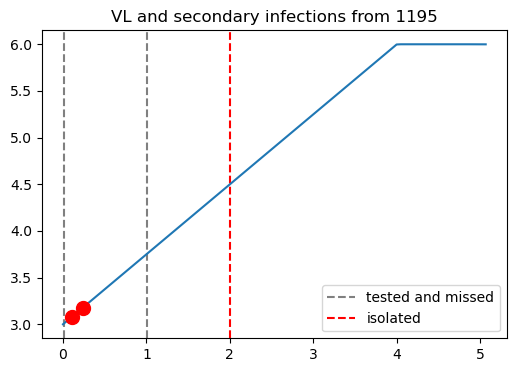

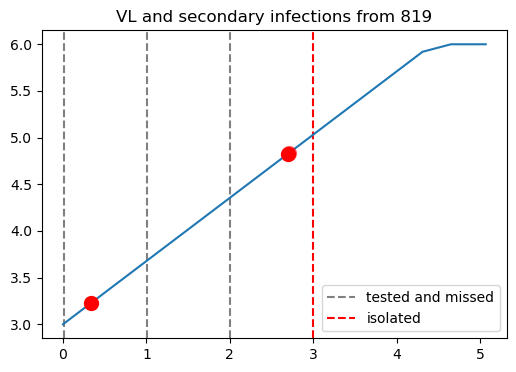

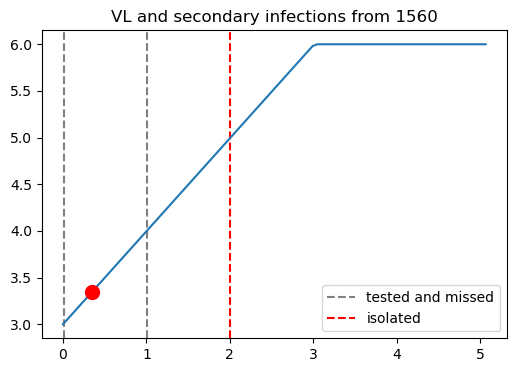

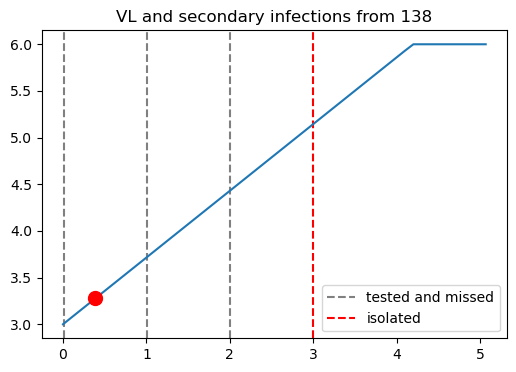

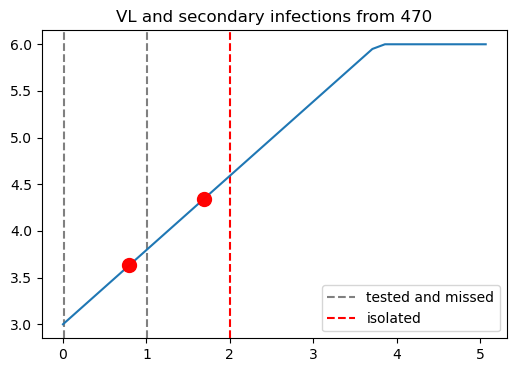

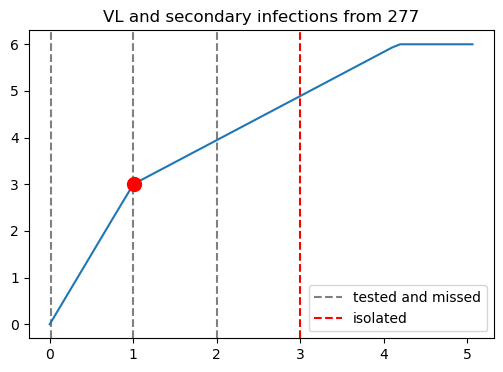

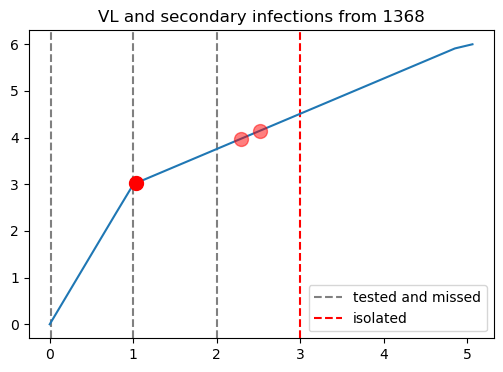

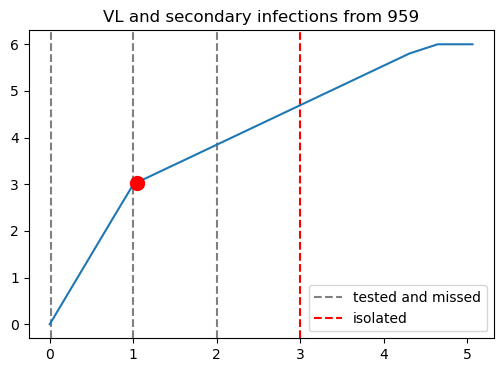

In [34]:
plot_sim_individual_history(sim_naive, top_n=10)

In [28]:
sim_correlated_weak = run_simulation(
    **{
        **parameters,
        **control_parameters,
        "pooling_strategy": "correlated_weak",
    }   
)

Household size does not match number of age brackets assigned. u20_o60_gt1
Generated overall age distribution:
0-9: 0.1005	(-0.0205 from target)
10-19: 0.1170	(-0.0140 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1410	(0.0080 from target)
40-49: 0.1250	(0.0010 from target)
50-59: 0.1375	(0.0065 from target)
60-69: 0.1290	(0.0140 from target)
70-79: 0.0770	(0.0070 from target)
80+: 0.0320	(-0.0060 from target)

Generated household size distribution:
1: 0.2850	(0.0013 from target)
2: 0.3630	(0.0179 from target)
3: 0.1303	(-0.0203 from target)
4: 0.1242	(-0.0034 from target)
5: 0.0609	(0.0031 from target)
6: 0.0231	(0.0005 from target)
7: 0.0134	(0.0009 from target)
Num households: 821
mean household size: 2.448393594

{'0-9': 201, '10-19': 234, '20-29': 282, '30-39': 282, '40-49': 250, '50-59': 275, '60-69': 258, '70-79': 154, '80+': 64}
Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


Viral loads in positive pools:  [[], [], [(94, -1.0, 3.0)], [], [(819, -1.0, 3.0), (112, -1.0, 3.0)], [], [(931, -1.0, 3.0)], [(1195, -1.0, 3.0)], [], [], [(1560, -1.0, 3.0)], [(470, -1.0, 3.0)], [], [(661, -1.0, 3.0)], [(613, -1.0, 3.0)], [(138, -1.0, 3.0)], []]
infected: 1079, transmissionTerms_I: [10.], transmissionTerms_Q: [0.], household_neighbors: {112, 1080, 341, 1078}, non_household_neighbors: [1163, 1176, 1337, 1146, 1180]
Household member states: [3, 1, 1, 1]
Non-household member states: [1, 1, 1, 1, 1]
Infected node 1079 got contribution from infectious contacts {112: 1.0} and quarantined contacts {}
infected: 1756, transmissionTerms_I: [10.], transmissionTerms_Q: [0.], household_neighbors: {1758, 931, 1757, 1755}, non_household_neighbors: [1616, 1555, 1550]
Household member states: [1, 3, 1, 1]
Non-household member states: [1, 1, 1]
Infected node 1756 got contribution from infectious contacts {931: 1.0} and quarantined contacts {}
infected: 1857, transmissionTerms_I: [10.],

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]


Viral loads in positive pools:  [[(1368, 0.0, 2.38)], [(959, 0.0, 2.38)], [(1649, 0.0, 2.38)], [(470, -1.0, 3.63)], [(743, 0.0, 2.38)], [(1196, 0.23, 1.68), (1857, 0.1, 2.07)], [(1727, 0.0, 2.38), (1195, -1.0, 3.59)], [(1294, 0.0, 2.38), (819, -1.0, 3.54), (1698, 0.34, 1.37)], [(138, -1.0, 3.57), (139, 0.39, 1.21)], [(613, -1.0, 3.61)], [(1238, 0.0, 2.38)], [(661, -1.0, 3.77)], [(1390, 0.0, 2.38)], [(1843, 0.0, 2.38), (277, 0.0, 2.38)], [(1560, -1.0, 3.79), (501, 0.35, 1.33)], [(1756, 0.08, 2.15), (931, -1.0, 3.56)], [(1755, 0.21, 1.74)], [(94, -1.0, 3.57)], [(1078, 0.47, 0.98)], [(112, -1.0, 3.76), (1079, 0.05, 2.24)]]
infected: 64, transmissionTerms_I: [10.], transmissionTerms_Q: [0.], household_neighbors: {277}, non_household_neighbors: [1, 38, 8, 46, 17, 24]
Household member states: [3]
Non-household member states: [1, 1, 1, 1, 1, 1]
Infected node 64 got contribution from infectious contacts {277: 1.0} and quarantined contacts {}
infected: 1938, transmissionTerms_I: [10.], transmis

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


Viral loads in positive pools:  [[(1728, 1.31, 1.74)], [(1727, 0.0, 3.73), (1726, 1.06, 2.51)], [(1756, 0.08, 3.79), (931, -1.0, 4.32)], [(1758, 1.31, 1.74), (1755, 0.21, 3.49)], [(661, -1.0, 4.83)], [(1074, 1.13, 2.29)], [(1843, 0.0, 3.74), (1158, 1.34, 1.66)], [(1769, 1.04, 2.54), (959, 0.0, 3.76)], [(743, 0.0, 3.76)], [(258, 1.19, 2.1), (747, 1.54, 1.07)], [(1368, 0.0, 3.67)], [(1938, 1.03, 2.58)], [(612, 1.55, 1.03), (613, -1.0, 4.45)], [(1857, 0.1, 3.53), (1195, -1.0, 4.42), (471, 0.79, 3.09)], [(470, -1.0, 4.51), (472, 1.69, 0.62), (1196, 0.23, 3.56)], [(907, 1.13, 2.29), (138, -1.0, 4.35), (139, 0.39, 3.35)], [(94, -1.0, 4.36), (1238, 0.0, 3.62), (1237, 1.47, 1.26)], [(112, -1.0, 4.8), (341, 1.1, 2.37)], [(1079, 0.05, 3.83), (1078, 0.47, 3.3), (1698, 0.34, 3.42)], [(64, 1.01, 2.64), (277, 0.0, 3.84)], [(1388, 1.62, 0.82), (501, 0.35, 3.45), (1390, 0.0, 3.86)], [(1389, 1.61, 0.84)], [(1649, 0.0, 3.71)], [(699, 1.08, 2.44)], [(819, -1.0, 4.28), (1294, 0.0, 3.79)], [(1560, -1.0, 4.

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]


Viral loads in positive pools:  [[(1196, 0.23, 4.49), (1857, 0.1, 4.27)], [(1843, 0.0, 4.65), (1158, 1.34, 3.62)], [(277, 0.0, 4.88), (64, 1.01, 3.6)], [(1649, 0.0, 4.58), (699, 1.08, 3.73)], [(1078, 0.47, 4.06), (1079, 0.05, 4.9)], [(341, 1.1, 3.55)], [(959, 0.0, 4.69), (1769, 1.04, 3.65)], [(1728, 1.31, 3.65)], [(1080, 2.85, 0.41), (1726, 1.06, 3.76), (1727, 0.0, 4.63)], [(139, 0.39, 4.13)], [(1561, 2.42, 1.71)], [(501, 0.35, 4.36)], [(1388, 1.62, 3.31)], [(1389, 1.61, 3.34), (1390, 0.0, 4.93)], [(1294, 0.0, 4.76)], [(1758, 1.31, 3.55), (1756, 0.08, 4.86), (1755, 0.21, 4.28), (1757, 1.89, 3.06)], [(931, -1.0, 5.09)], [(1938, 1.03, 3.94)], [(1368, 0.0, 4.5), (1369, 2.3, 2.09), (612, 1.55, 3.34), (1370, 2.51, 1.43)], [(1238, 0.0, 4.39), (1237, 1.47, 3.45)], [(747, 1.54, 3.4), (746, 2.39, 1.8), (743, 0.0, 4.7), (818, 2.71, 0.86), (819, -1.0, 5.03)], [(1699, 2.7, 0.89), (1698, 0.34, 4.25), (258, 1.19, 3.59), (745, 2.09, 2.71)], [(1075, 2.34, 1.95), (1074, 1.13, 3.76), (471, 0.79, 4.13)],

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


Viral loads in positive pools:  [[(612, 1.55, 4.1)], [(1388, 1.62, 4.15), (1389, 1.61, 4.24)], [(1857, 0.1, 4.94)], [(1755, 0.21, 5.0)], [(1757, 1.89, 3.67), (1758, 1.31, 4.36)], [(1698, 0.34, 5.01), (818, 2.71, 3.21)], [(1699, 2.7, 3.23), (699, 1.08, 4.54)], [(64, 1.01, 4.22), (1075, 2.34, 3.64)], [(1076, 2.37, 3.5), (1074, 1.13, 4.64)], [(471, 0.79, 5.09), (472, 1.69, 3.91)], [(473, 2.99, 3.01)], [(139, 0.39, 4.84)], [(367, 3.2, 2.4)], [(907, 1.13, 4.49)], [(1488, 3.05, 2.86)], [(747, 1.54, 4.3), (1726, 1.06, 4.58)], [(744, 3.65, 1.05), (746, 2.39, 3.48), (745, 2.09, 3.57), (1728, 1.31, 4.61), (258, 1.19, 4.34)], [(1080, 2.85, 3.11), (341, 1.1, 4.17), (1078, 0.47, 4.75)], [(1769, 1.04, 4.35)], [(1369, 2.3, 3.58), (1938, 1.03, 4.93), (1367, 3.31, 2.08)], [(1370, 2.51, 3.33)], [(1237, 1.47, 4.33), (501, 0.35, 5.19)], [(1561, 2.42, 3.42)], [(1158, 1.34, 4.57)], [(1391, 3.21, 2.37)], [(186, 3.28, 2.14)]]
infected: 600, transmissionTerms_I: [0.1], transmissionTerms_Q: [0], household_neigh

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


Viral loads in positive pools:  [[(1757, 1.89, 4.19)], [(1758, 1.31, 5.05)], [(1080, 2.85, 3.75)], [(341, 1.1, 4.7)], [(747, 1.54, 5.06), (746, 2.39, 4.16)], [(600, 4.1, 2.27), (744, 3.65, 3.19), (258, 1.19, 4.98), (745, 2.09, 4.1)], [(1389, 1.61, 5.0), (1388, 1.62, 4.87)], [(186, 3.28, 3.38), (1391, 3.21, 3.43)], [(1769, 1.04, 4.94)], [(64, 1.01, 4.75)], [(1488, 3.05, 3.51)], [(473, 2.99, 3.86), (612, 1.55, 4.75)], [(472, 1.69, 4.51)], [(1075, 2.34, 4.46), (1076, 2.37, 4.19)], [(38, 4.76, 0.3)], [(1699, 2.7, 3.88)], [(818, 2.71, 3.82)], [(1369, 2.3, 4.29)], [(1367, 3.31, 3.39), (1370, 2.51, 3.91)], [(1561, 2.42, 4.05)], [(367, 3.2, 3.64)], [(1237, 1.47, 5.07)]]


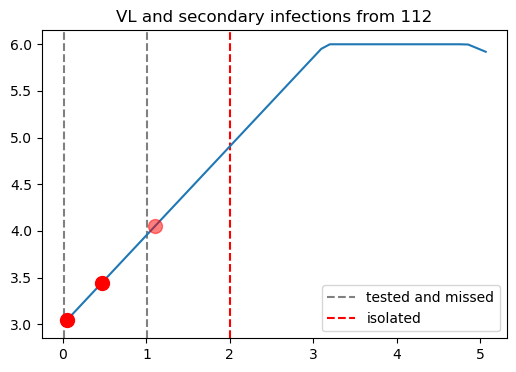

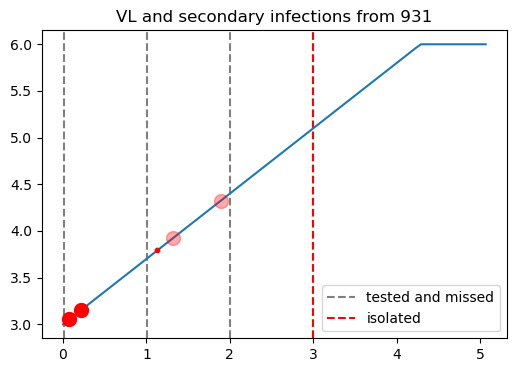

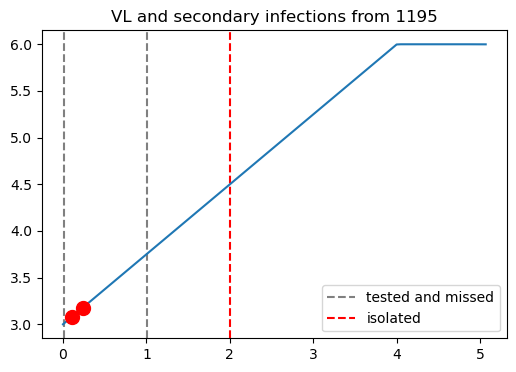

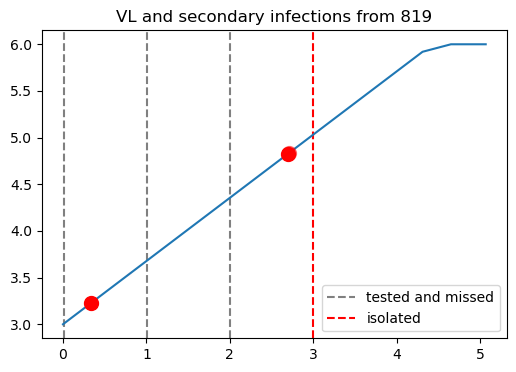

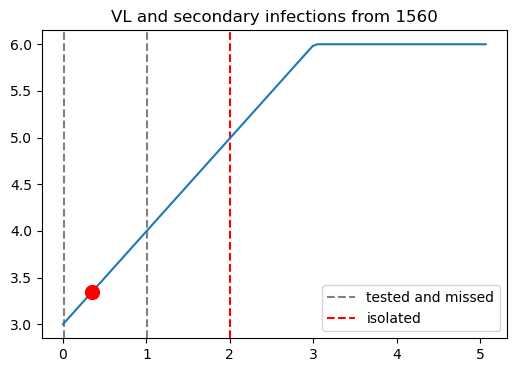

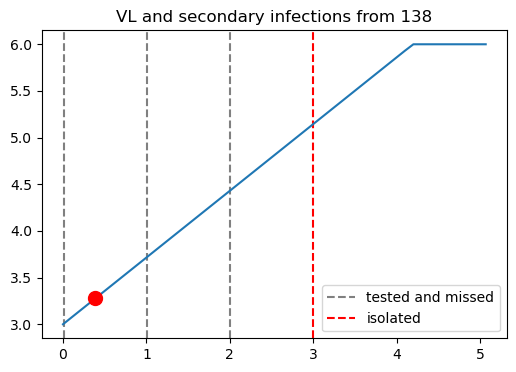

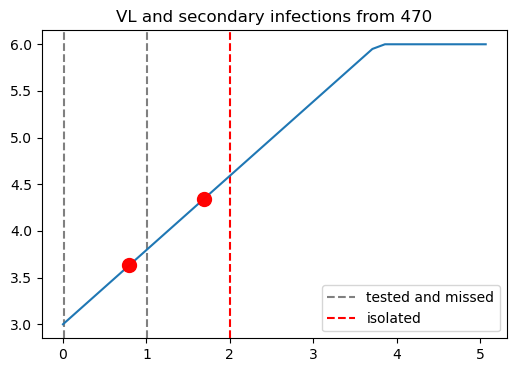

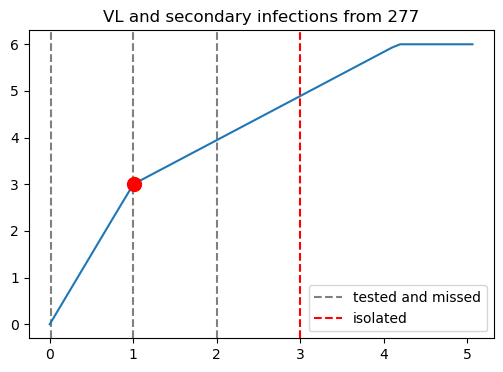

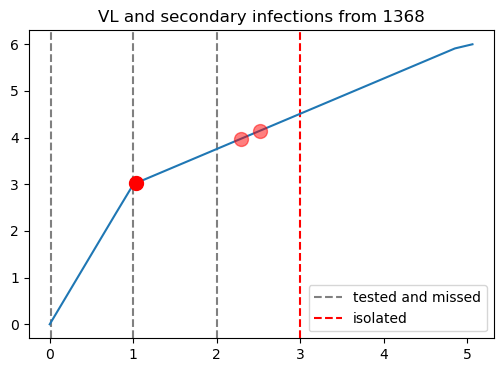

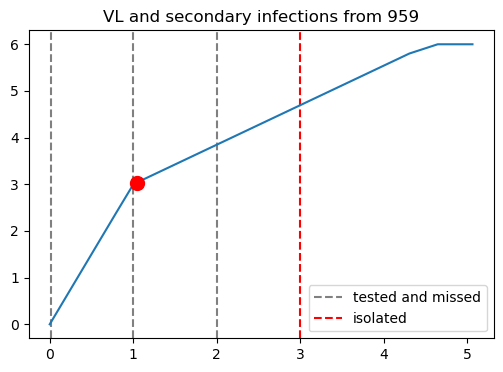

In [31]:
plot_sim_individual_history(sim_correlated_weak, 10)